<a href="https://colab.research.google.com/github/jennermaxim/machine_learning/blob/main/Salary_Estimation_K_NEAREST_NEIGHBOUR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [2]:
import pandas as pd
import numpy as np

Choose Dataset from Google Drive

Load Dataset

In [4]:
dataset = pd.read_excel('/content/drive/MyDrive/dataset/salary.xlsx')

Summarize Dataset

In [5]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


Mapping Salary Data to Binary Value

In [6]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVarible)

In [7]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [8]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

Splitting Dataset into Train & Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

Feature Scaling we scale our data to make all the



Fit_Transform - fit method is calculating the mean and variance of each of the features present in our data ###Transform - Transform method is transforming all the features using the respective mean and variance, ###We want our test data to be a completely new and a surprise set for our model

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Finding the Best K-Value

In [11]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40

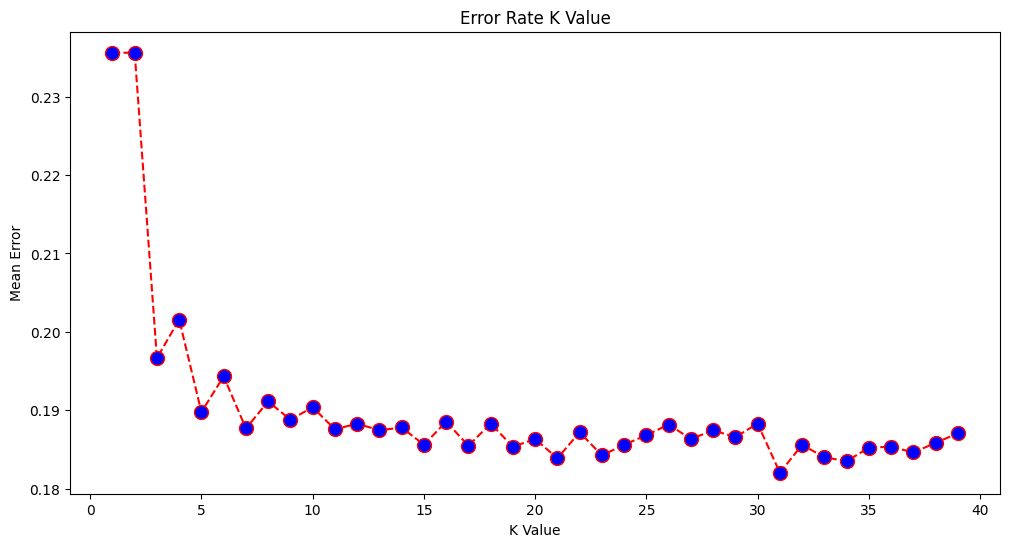

In [18]:
for i in range(1, 40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

# Truncate error list to match the length of range(1, 40)
error = error[:len(range(1, 40))]

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

Training

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Predicting, wheather new application's salary is less than or more than 50k based on previous work record

In [23]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Eduction: "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Hour's Per WeeK: "))
newEmp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Application's Salary might be above 50K")
else:
  print("Application's salary might be less than 50K")

Enter New Employee's Age: 22
Enter New Employee's Eduction: 10
Enter New Employee's Capital Gain: 0
Enter New Employee's Hour's Per WeeK: 40
[0]
Application's salary might be less than 50K


Predict for all Test Data

In [25]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Evaluating Model - CONFUSION MATRIX

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[5295  898]
 [1020  928]]
Accuracy of the Model: 76.4402407566638%
